# A3a: Signals and Noise
Finn Hittson - fxh157  
CSDS 464  
Due: March 9th, 2023

In [1]:
%load_ext autoreload
%autoreload 2

import A3a_fxh157 as a3a
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy
import IPython

import sys
sys.path.append('../464-A1b_fxh157_files/')
import A1b_fxh157 as a1b

## 1. Continuous signals and sampling

### 1a. Sampled functions

Example: Plot of a $1000Hz$ sinewave sampled at $8000Hz$.

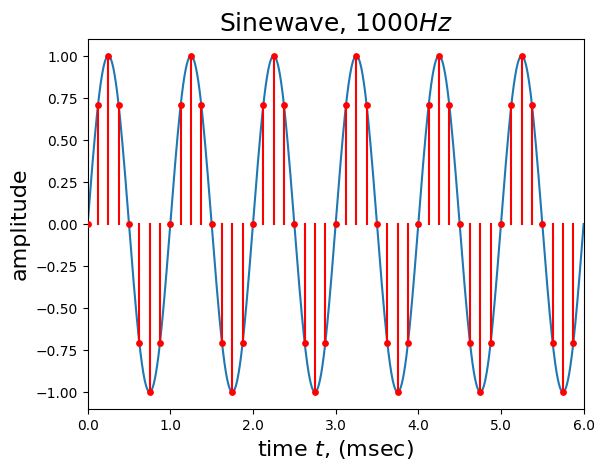

In [2]:
a3a.plot_sampled_function(g=a1b.sinewave, fs=8000, tlim=(0, 6), tscale=0.001, tunits="msec", title="Sinewave", f=1000)

Example: Plot of a $10Hz$ gabor function sampled at $100Hz$.

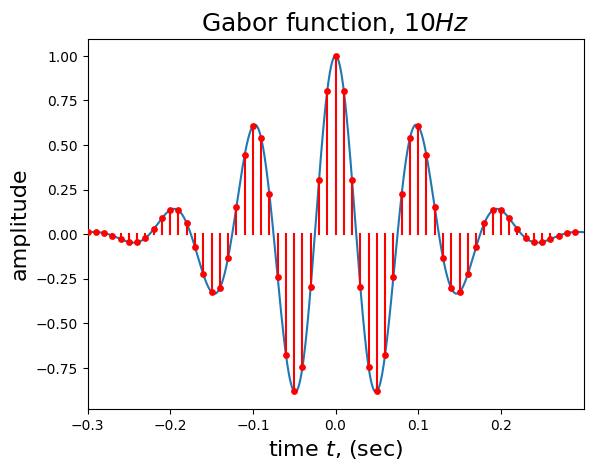

In [3]:
a3a.plot_sampled_function(g=a1b.gabore, fs=100, tlim=(-0.3,0.3), tscale=1, tunits="sec", title="Gabor function", f=10, sigma=0.1)

Example: Plot of a $200Hz$ gammatone sampled at $1000Hz$.

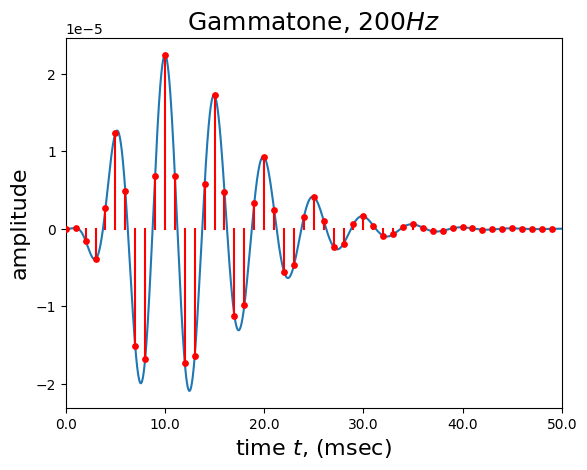

In [4]:
a3a.plot_sampled_function(g=a1b.gammatone, fs=1000, tlim=(0,50/1000), tscale=1, tunits="msec", title="Gammatone", f=200)

### 1b. The Nyquist frequency and aliasing

Example: Plot of a $315Hz$ sinewave sampled at $1000Hz$. The sinewave below the Nyquist frequency shows samples per period that are unevenly distributed.

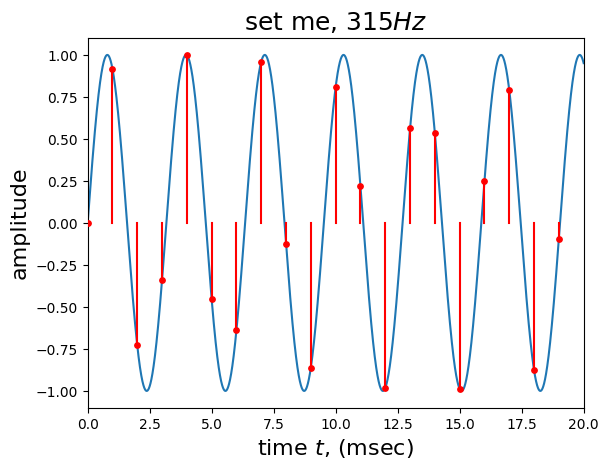

In [5]:
a3a.plot_sampled_function(g=a1b.sinewave, fs=1000, tlim=(0, 20), tscale=0.001, tunits="msec", f=315)

Example: Plot of a $500Hz$ sine wave sampled at $1000Hz$. Sinewave at Nyquist.

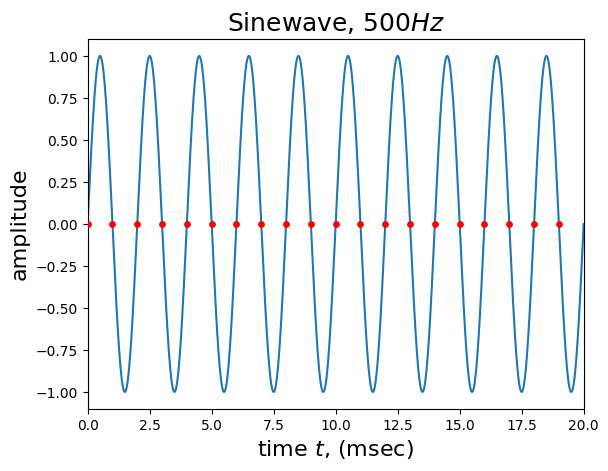

In [6]:
a3a.plot_sampled_function(g=a1b.sinewave, fs=1000, tlim=(0, 20), tscale=0.001, title="Sinewave", tunits="msec", f=500)

Example: Plot of a $1Hz$ cosine wave sampled at $1Hz$ with a duration of $7sec$. This demonstrates cosine at Nyquist.

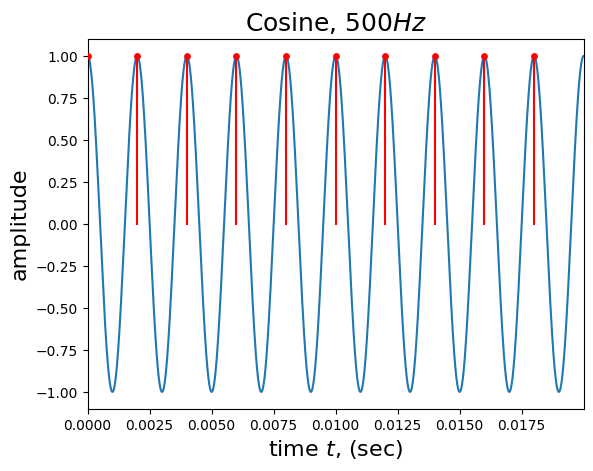

In [7]:
a3a.plot_sampled_function(g=a1b.sinewave, fs=500, tlim=(0, 20), tscale=0.001, title="Cosine", tunits="sec", f=500, d=0.25/500)

Example: Plot of a $1100Hz$ cosine wave sampled at $1000Hz$. Cosine wave sampled above Nyquist to show aliasing.

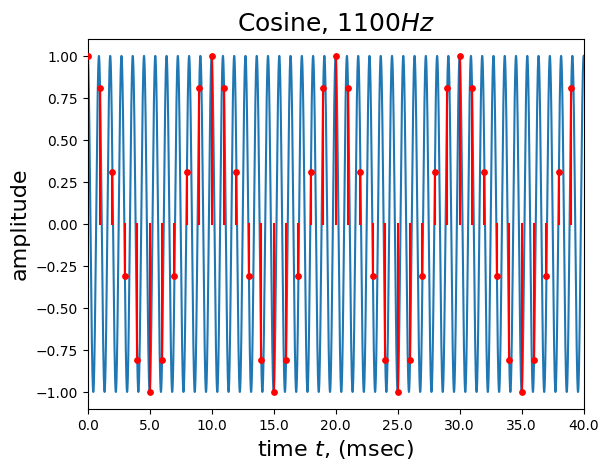

In [8]:
a3a.plot_sampled_function(g=a1b.sinewave, fs=1000, tlim=(0, 40), tscale=0.001, tunits="msec", title="Cosine", f=1100, d=0.25/1100)

## 2. Signals

### 2a. Delta and step functions

Example: Plot of the Dirac delta function delayed by 2 seconds.

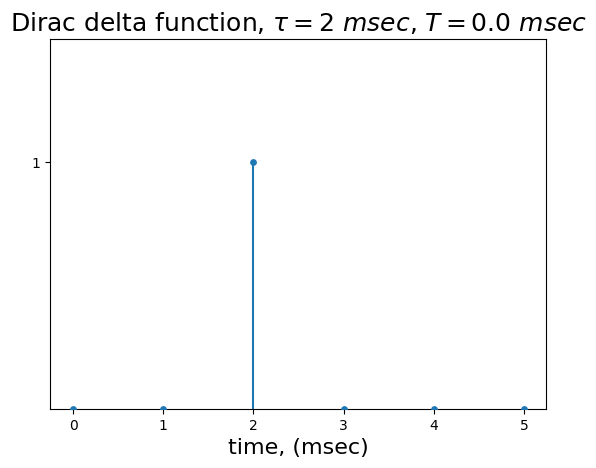

In [9]:
a3a.plot_delta_step(t0=0, tn=6, fs=1, g=a3a.d, tau=2, title="Dirac delta function", tunits="msec", plot_type="stem")

Example: Plot a step function starting at 50 ms that is 25 ms in duration and sampled at 500 Hz

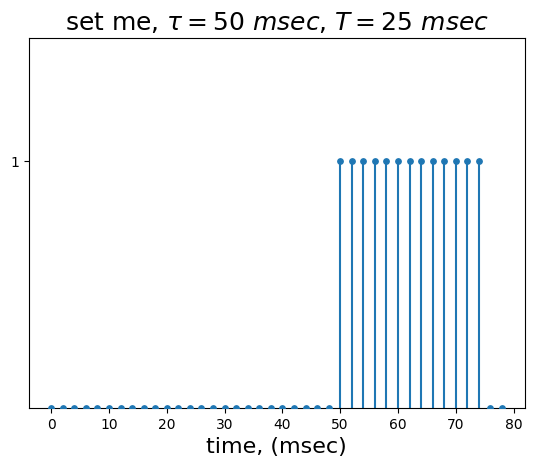

In [10]:
a3a.plot_delta_step(t0=0, tn=80, fs=500, g=a3a.u, tau=50, T=25, tunits="msec", tscale=0.001, plot_type="stem")

### 2b. `gensignal`

Example: Plot of a $100ms$ signal with a $50ms$ delayed step function that lasts for $25ms$.

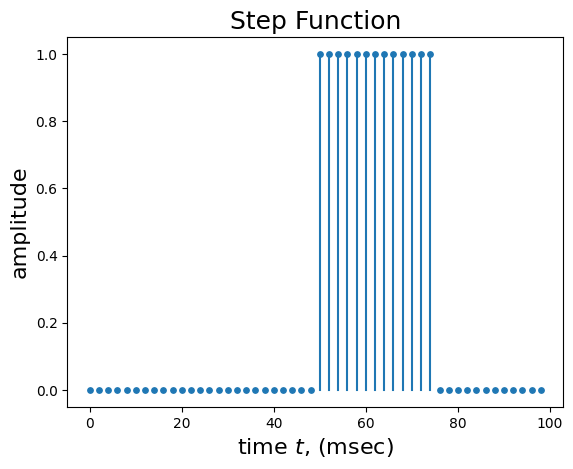

In [11]:
t0, y0 = a3a.gensignal(t0=0, tn=100, g=a3a.u, fs=0.5, tau=50, T=25, tscale=1)
a3a.plot_stem(t0, y0, title="Step Function", tunits="msec")

Example: Plot of a Dirac delta function delayed by $2sec$.

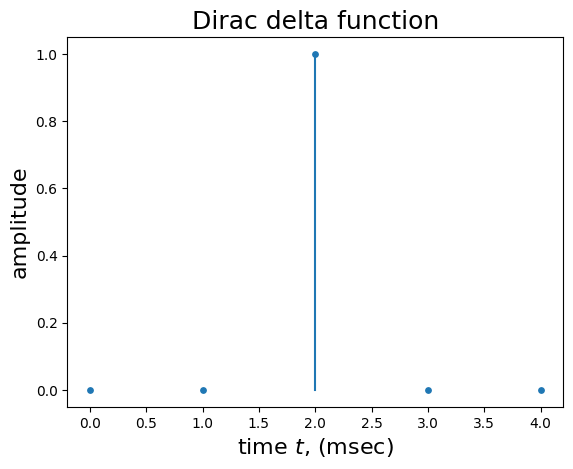

In [12]:
t, y = a3a.gensignal(t0=0, tn=5, g=a3a.d, fs=1, tau=2, tscale=1)
a3a.plot_stem(t, y, title="Dirac delta function", tunits="msec")

Example: Plot of a gammatone function with frequency of $100Hz$, sampled at $1000Hz$. 

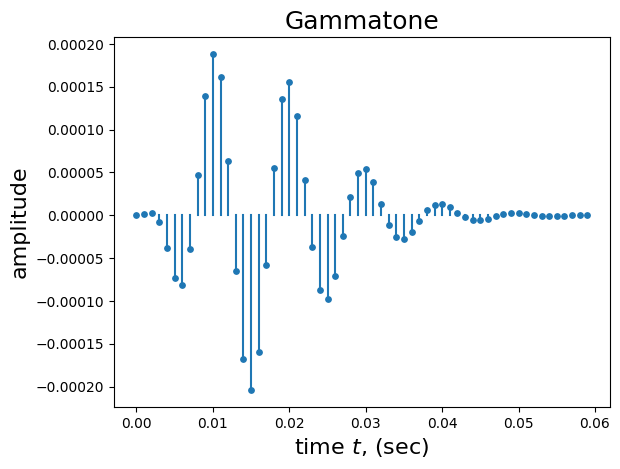

In [13]:
t, y = a3a.gensignal(t0=0, tn=0.06, g=a1b.gammatone, fs=1000, tau=0, T=0.06, f=100)
a3a.plot_stem(t, y, title="Gammatone", tunits="sec")

## 3. Noise and SNR

### 3a. `energy`, `power`, and `snr`

Example: Plot and computation of power and energy of a $1Hz$ sinewave.

sinewave energy: 30.0
sinewave power: 0.25210084033613445


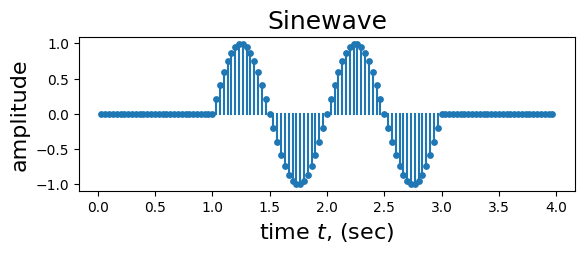

In [14]:
t, y = a3a.gensignal(t0=0, tn=4, g=a1b.sinewave, fs=30, tau=1, T=2, tscale=1, f=1)
print(f"sinewave energy: {a3a.energy(y)}")
print(f"sinewave power: {a3a.power(y)}")
plt.figure().set_figheight(2)
a3a.plot_stem(t, y, title="Sinewave", tunits="sec")

Example: Plot and computation of power and energy of a $100Hz$ gammatone.

gammatone energy: 2.9970499603720283e-07
gammatone power: 2.997049960372028e-09


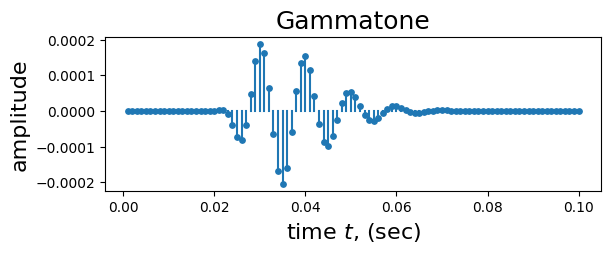

In [15]:
t, y = a3a.gensignal(t0=0, tn=0.1, g=a1b.gammatone, fs=1000, tau=0.02, T=0.06, tscale=1, f=100)
print(f"gammatone energy: {a3a.energy(y)}")
print(f"gammatone power: {a3a.power(y)}")
plt.figure().set_figheight(2)
a3a.plot_stem(t, y, title="Gammatone", tunits="sec")

### 3b. Noisy signals

Example: Plot a $100ms$ waveform sampled at $1000Hz$ with a delta function delayed by $50ms$ with noise standard deviation of $0.1$.

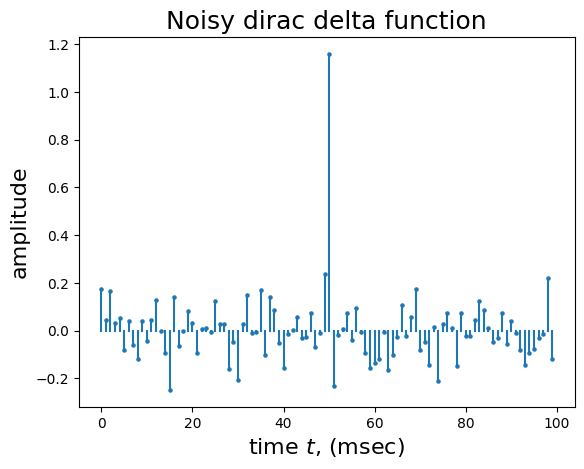

In [16]:
t, y, n = a3a.noisysignal(t0=0, tn=100, g=a3a.d, fs=1000, tau=50, T=0, s=0.1, tscale=0.001)
a3a.plot_noisysignal(t=t, y=y+n, title="Noisy dirac delta function", tunits="msec", plot_type="stem")

Example: Plot of a step function delayed by $1sec$ with a duration of $2sec$ in Gaussian noise with $\sigma=0.1$.

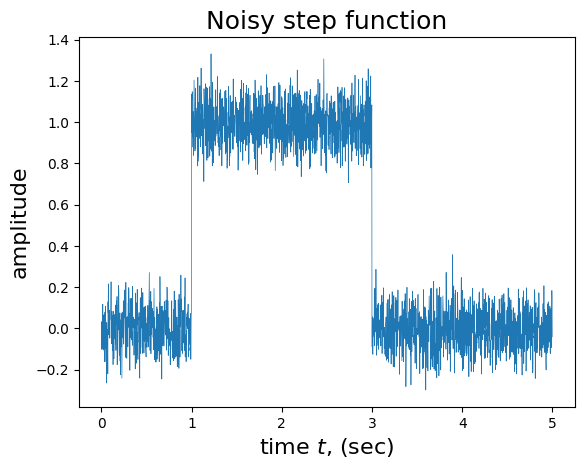

In [17]:
t, y, n = a3a.noisysignal(t0=0, tn=5, g=a3a.u, fs=500, tau=1, T=2, s=0.1)
a3a.plot_noisysignal(t, y+n, "Noisy step function")

Example: Plot of noisy gammatone with frequency $100Hz$ delayed by $0.01sec$, with a duration of $0.06sec$ in Gaussian noise of $\sigma=0.000025$.

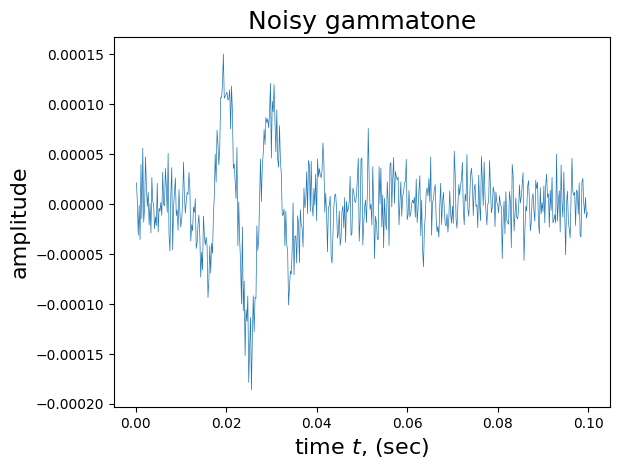

In [18]:
t, y, n = a3a.noisysignal(t0=0, tn=0.1, g=a1b.gammatone, fs=5000, tau=0.01, T=0.06, s=0.000025, f=100)
a3a.plot_noisysignal(t, y+n, title="Noisy gammatone")

### 3c. Noise level specified by SNR

Calculating the signal power over the entire wave form leads to a biased result since it includes the regions of the waveform that are not expressing the signal. Therefore this would cause the computed signal power to be falsely low since the signals wave is being averaged over the entire waveform. The following examples show the computed sigma with and without knowledge of the signals location.

target sigma: 0.2
known signal location sigma: 0.2119
unknown signal location sigma: 0.282


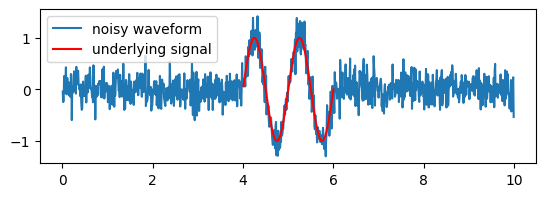

In [19]:
s = 0.2
sigma_known = sigma_unknown = 0
N = 100
fs = 100
tau = 4
T = 2

for _ in range(N):
    t, x, n = a3a.noisysignal(t0=0, tn=10, g=a1b.sinewave, fs=fs, tau=tau, T=T, s=s)

    Ps_known = a3a.power((x+n)[fs*tau:fs*(tau+T)])
    Ps_known = a3a.power(np.concatenate((n[:fs*tau], n[fs*(tau+T):])))
    SNR_known = a3a.snr(Ps_known, Ps_known)

    Ps_unknown = a3a.power(x+n)
    Pn_unknown = a3a.power(n)
    SNR_unknown = a3a.snr(Ps_unknown, Pn_unknown)

    sigma_known += a3a.snr2sigma(x, snr=SNR_unknown)
    sigma_unknown += a3a.snr2sigma(x, snr=SNR_known)

print(f"target sigma: {s}")
print(f"known signal location sigma: {round(sigma_known/N, 4)}")
print(f"unknown signal location sigma: {round(sigma_unknown/N, 4)}")
plt.figure().set_figheight(2)
plt.plot(t, x+n, label="noisy waveform")
plt.plot(t[400:600], x[400:600], 'r', label="underlying signal")
plt.legend()
plt.show()

Example: Plot of a noisy sinewave with frequency $100Hz$ in $10dB$ of Gaussian noise with $\sigma=0.1$.

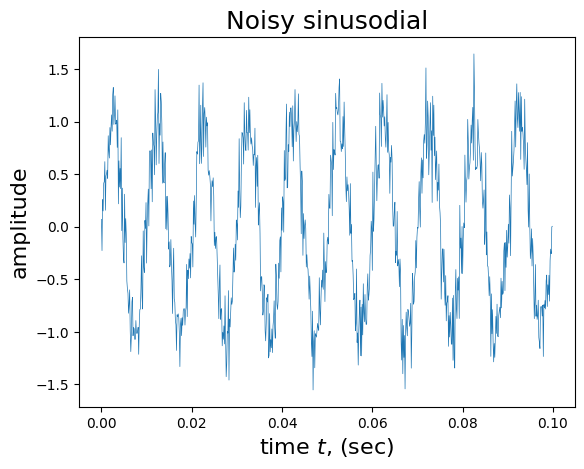

In [20]:
_, y, _ = a3a.noisysignal(t0=0, tn=0.1, g=a1b.sinewave, fs=8000, tau=0, T=0.1, s=0, tscale=1, f=100)
s = a3a.snr2sigma(x=y, snr=10)
t, y, n = a3a.noisysignal(t0=0, tn=0.1, g=a1b.sinewave, fs=8000, tau=0, T=0.1, s=s, tscale=1, f=100)
a3a.plot_noisysignal(t=t, y=y+n, title="Noisy sinusodial", tunits="sec", plot_type="line")

### 3d. Estimating SNR

Example: Estimate the SNR of a noisy $1Hz$ sinewave of length $5sec$.

signal start index: 1000/6999
signal end index: 6000/6999
snr: 15.478dB

estimated start index: 1203/6999
estimated end index: 5780/6999
estimated snr: 8.091dB


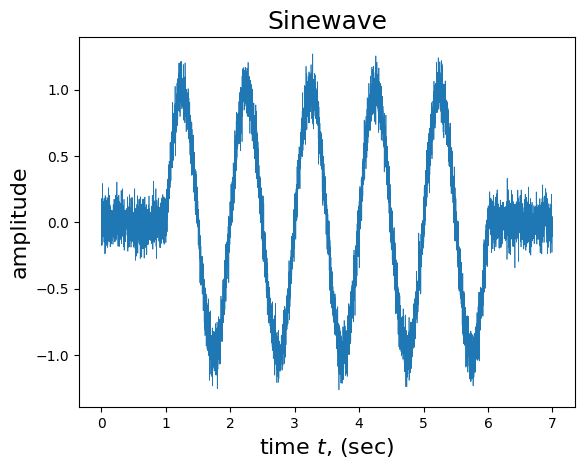

In [21]:
fs = 1000
tau = 1
T = 5
t, y, n = a3a.noisysignal(t0=0, tn=7, g=a1b.sinewave, fs=fs, tau=tau, T=T, s=0.1)
signal = y+n

Ps = a3a.power(y)
Pn = a3a.power(n)
print(f"signal start index: {fs*tau}/{len(signal)}")
print(f"signal end index: {fs*(tau+T)}/{len(signal)}")
print(f"snr: {round(10*math.log10(a3a.snr(Ps, Pn)), 3)}dB\n")

th = max(signal)*(4*s)
start, stop = a3a.extent(y=signal, th=th)
Ps = a3a.power(signal[start:stop])
Pn = a3a.power(np.concatenate((signal[:start], signal[stop:])))
print(f"estimated start index: {start}/{len(signal)}")
print(f"estimated end index: {stop}/{len(signal)}")
print(f"estimated snr: {round(10*math.log10(a3a.snr(Ps, Pn)), 3)}dB")

a3a.plot_noisysignal(t, signal, title="Sinewave")

Example: Plot a $2 ms$ step function with a delay of $50 ms$ in a waveform of $100 ms$ with $10 dB$ SNR calculated with knowledge of the signal location.

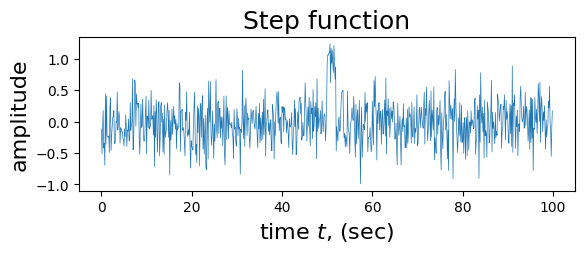

In [22]:
fs = 8
tau = 50
T = 2
t, x, _ = a3a.noisysignal(t0=0, tn=100, g=a3a.u, fs=fs, tau=tau, T=T, s=0, tscale=1)
s = a3a.snr2sigma(x[fs*tau:fs*(tau+T)], snr=10)
t, x, n = a3a.noisysignal(t0=0, tn=100, g=a3a.u, fs=fs, tau=tau, T=T, s=s, tscale=1)
plt.figure().set_figheight(2)
a3a.plot_noisysignal(t=t, y=x+n, title="Step function", tunits="sec")

## 4. Grand synthesis

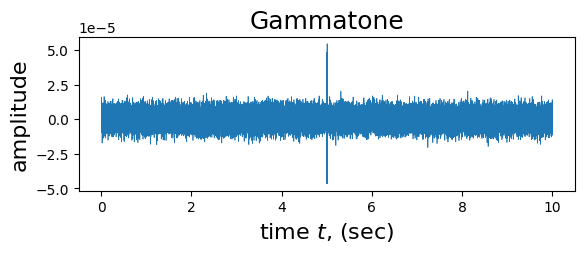

In [23]:
t, x, n = a3a.noisysignal(t0=0, tn=10, g=a1b.gammatone, fs=5000, tau=5, T=0.3, s=0.000005, f=500)
plt.figure().set_figheight(2)
a3a.plot_noisysignal(t, x+n, title="Gammatone")
scipy.io.wavfile.write("sound.wav", rate=44100, data=(x+n).astype(np.float32)*10000)
IPython.display.Audio("sound.wav")